# Time series analysis

In [1]:
# Import necessary modules
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics import tsaplots
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime
from collections import OrderedDict
%matplotlib notebook

In [3]:
#setup
df = pd.read_csv("consumption.csv")

In [4]:
# Setting an index for df
df = df.set_index("meter_id")

In [5]:
df_T = df.T
df_T.index = pd.to_datetime(df_T.index)

#resampling the data into daily usage:
df_T_daily = df_T.resample('D').mean()
#df_daily = df_T_daily.T

In [6]:
#resampling the data into weekly usage:
df_T_weekly = df_T.resample('W').mean()

In [7]:
#resampling the data into montly usage:
df_T_monthly = df_T.resample('M').mean()

In [8]:
#resampling the data into montly usage:
df_T_hourly = df_T.resample('H').mean()
df_T_half_hourly=df_T.resample('30Min').mean()

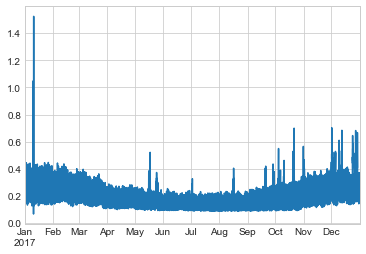

In [7]:
df_T.mean(axis=1).plot() #This plot look a lot like the one in our first notebook

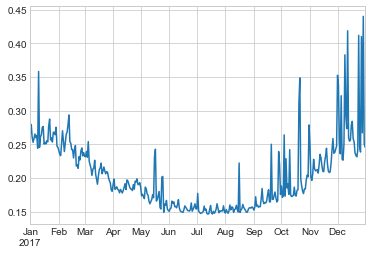

In [8]:
df_T_daily.mean(axis=1).plot()

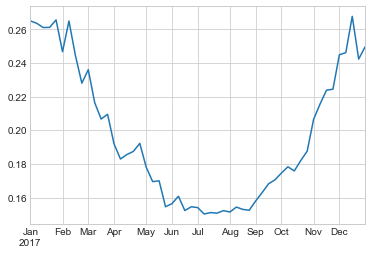

In [9]:
df_T_weekly.mean(axis=1).plot()

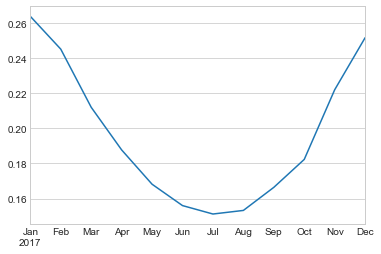

In [13]:
df_T_monthly.mean(axis=1).plot()

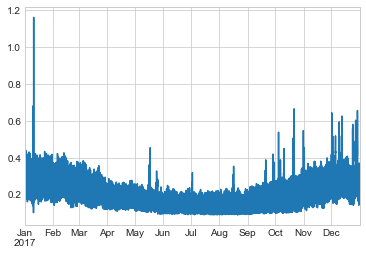

In [29]:
df_T_hourly.mean(axis=1).plot()

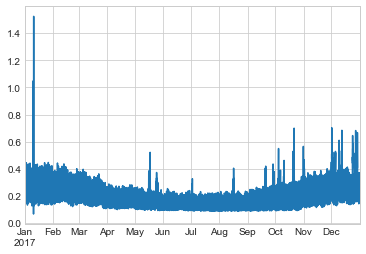

In [30]:
df_T_half_hourly.mean(axis=1).plot()

In [32]:
print(df_T.shape)
print(df_T_daily.shape)
print(df_T_weekly.shape)
print(df_T_monthly.shape)
print(df_T_hourly.shape)
print(df_T_half_hourly.shape)

(17520, 3248)
(365, 3248)
(53, 3248)
(12, 3248)
(8760, 3248)
(17520, 3248)


### Weekly pattern

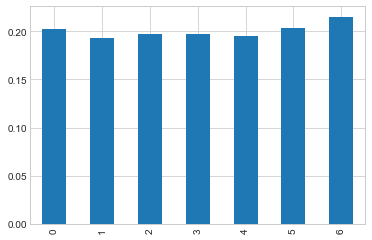

In [22]:
df_T_daily.groupby(df_T_daily.index.weekday).mean().mean(axis=1).plot(kind='bar')

### Monthly pattern

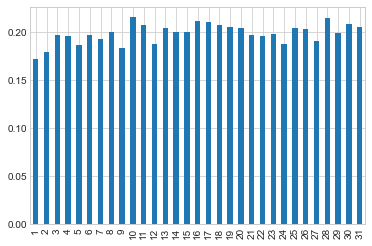

In [35]:
df_T_daily.groupby(df_T_daily.index.day).mean().mean(axis=1).plot(kind='bar')

### Hourly pattern

<IPython.core.display.Javascript object>


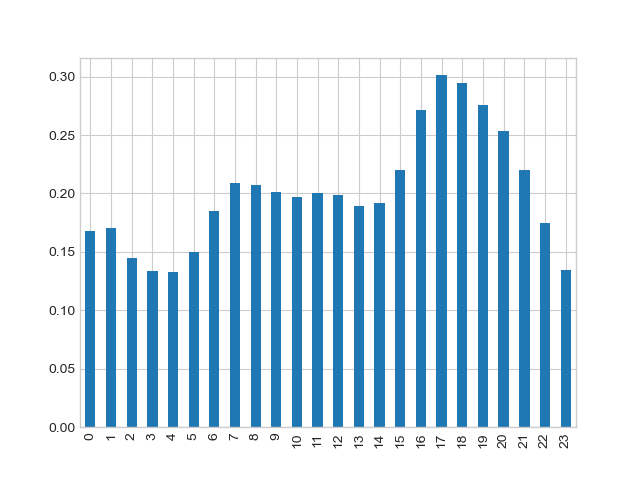

<AxesSubplot:>

In [19]:
df_T_hourly.groupby(df_T_hourly.index.hour).mean().mean(axis=1).plot(kind='bar')

strangly the values at 23 and 0 seems quite far apart. Maybe it just looks like this since they're not next to each other in ther curve

### Decomposition

C:\Users\joshua\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  
C:\Users\joshua\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


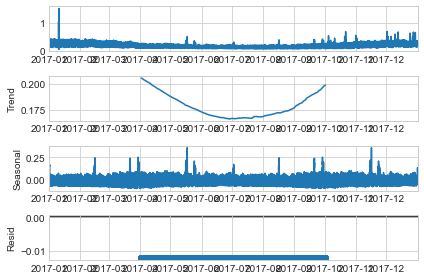

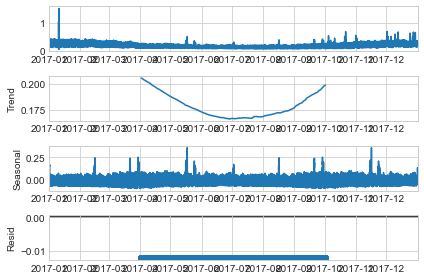

In [21]:
# Decompose the time series with a yearly seasonality
stl = seasonal_decompose(df_T_half_hourly.mean(axis=1), model='additive', freq=24*365)

_ = stl.plot()

stls = seasonal_decompose(df_T_half_hourly.mean(axis=1), model='multiplicative', freq=24*365)

_ = stl.plot()

We're able to extract some seasonality but it is clear that the trend we find is actually a yearly seasonanlity. The residue is more or less constant.

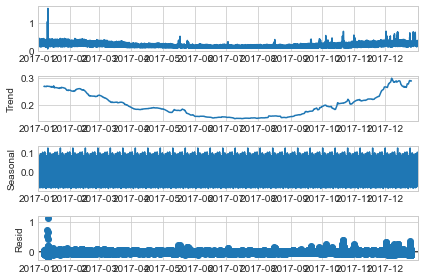

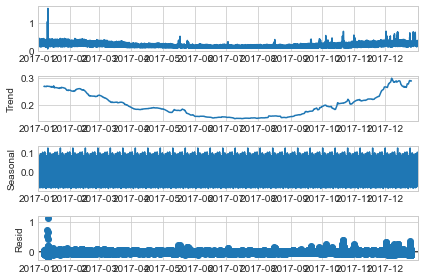

In [27]:
# Decompose the time series with a yearly seasonality
stl = seasonal_decompose(df_T_half_hourly.mean(axis=1), model='additive', period=2*24*12) #montly seonality

_ = stl.plot()

stls = seasonal_decompose(df_T_half_hourly.mean(axis=1), model='multiplicative', period=2*24*12)

_ = stl.plot()

<IPython.core.display.Javascript object>


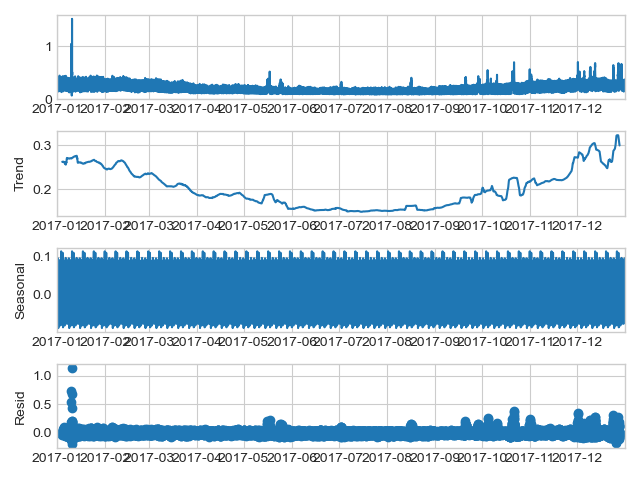

<IPython.core.display.Javascript object>


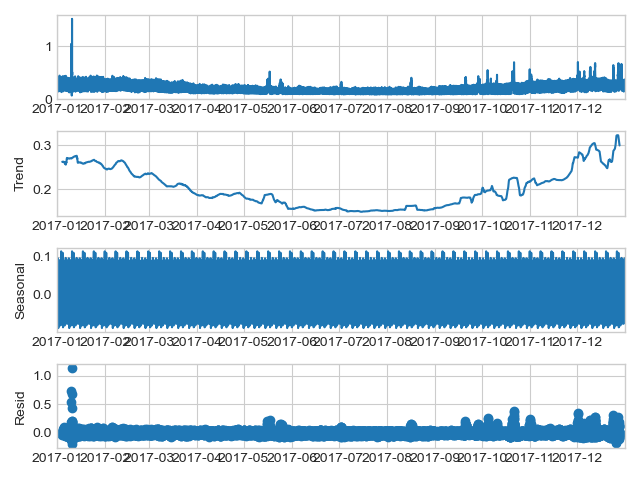

In [31]:
# Decompose the time series with a yearly seasonality
stl = seasonal_decompose(df_T_half_hourly.mean(axis=1), model='additive', period=2*24*7) #weekly seonality

_ = stl.plot()

stls = seasonal_decompose(df_T_half_hourly.mean(axis=1), model='multiplicative', period=2*24*7)

_ = stl.plot()

In [2]:
#TO MEMORY INTENSIVE I'M NOT SURE IF THIS ACTUALLY WORKS
#df_half_hourly=df_T_half_hourly.mean(axis=1)
# Allocate structures to save the deseasonalized data, and the cumulated seasonality:
#df_deseasonalized = df_half_hourly.copy()
#freqs = OrderedDict()
#freqs['weekly'] = 2*24*7
#freqs['monthly'] = 2*24*12
#"seasonality = {}
# df_seasonal_total = pd.DataFrame(0,
#                                        index   = df_deseasonalized.index,
#                                        columns = ["consumption"])

# trend = pd.DataFrame(0, index   = df_deseasonalized.index,columns = ["consumption"])
# residuals = pd.DataFrame(0, index   = df_deseasonalized.index,columns = ["consumption"])
    
# # For every variable in our time series
# seasonality["consumption"] = pd.DataFrame(index=df_deseasonalized.index, columns = freqs.keys())
# trend      ["consumption"] = pd.DataFrame(index=df_deseasonalized.index, columns = freqs.keys())
    
# # For every frequency
# for season, freq in freqs.items():
#     # Compute and plot the seasonality 
#     stl = seasonal_decompose(df_deseasonalized, model='additive', freq=freq, extrapolate_trend='freq')        
#     seasonality[season] = stl.seasonal
        
#     # Cumulate results
#     df_deseasonalized = df_deseasonalized - stl.seasonal
#     df_seasonal_total = df_seasonal_total + stl.seasonal
#     trend             = stl.trend
#     residuals       = stl.resid

# # Gather everything into a single DataFrame for direction_centre
# df_comb = pd.DataFrame({'original'          : df_half_hourly,
#                                     'seasonality_weekly': seasonality['weekly'],
#                                     'seasonality_yearly': seasonality['yearly'],
#                                     'seasonality_total' : df_seasonal_total['direction_centre'],
#                                     'trend'             : trend['direction_centre'],
#                                     'residuals'         : residuals['direction_centre'],
#                                     'deseasonalized'    : df_deseasonalized['direction_centre']},
#                                    index = df_half_hourly.index)

### auto correlation

<IPython.core.display.Javascript object>


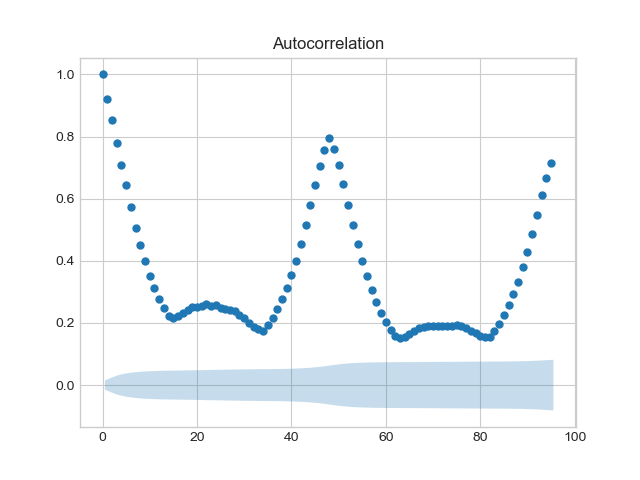

In [11]:
_= tsaplots.plot_acf(df_T_half_hourly.mean(axis=1), lags = np.arange(24*2*2),  use_vlines=False) #auto correlation 2 days

<IPython.core.display.Javascript object>


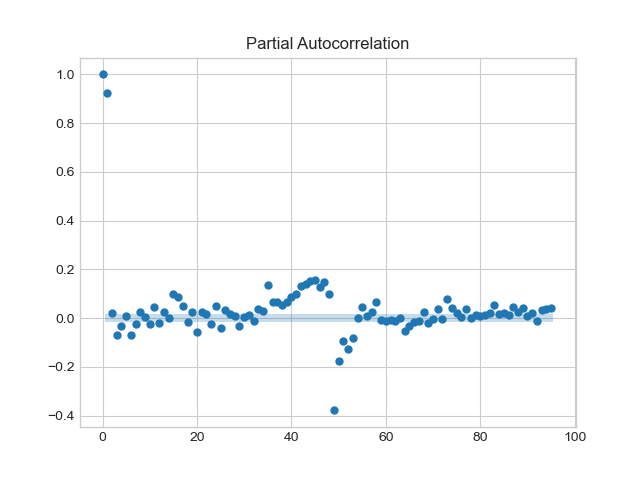

In [14]:
_= tsaplots.plot_pacf(df_T_half_hourly.mean(axis=1), lags = np.arange(24*2*2), use_vlines=False)

<IPython.core.display.Javascript object>


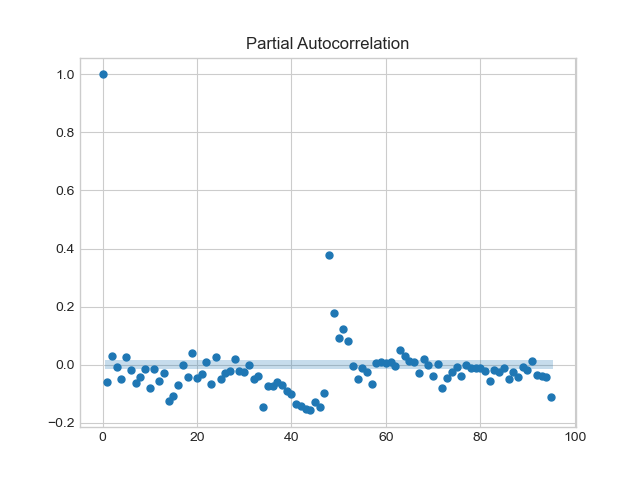

In [15]:
_= tsaplots.plot_pacf(df_T_half_hourly.mean(axis=1).diff()[1:], lags = np.arange(24*2*2),use_vlines=False)

<IPython.core.display.Javascript object>


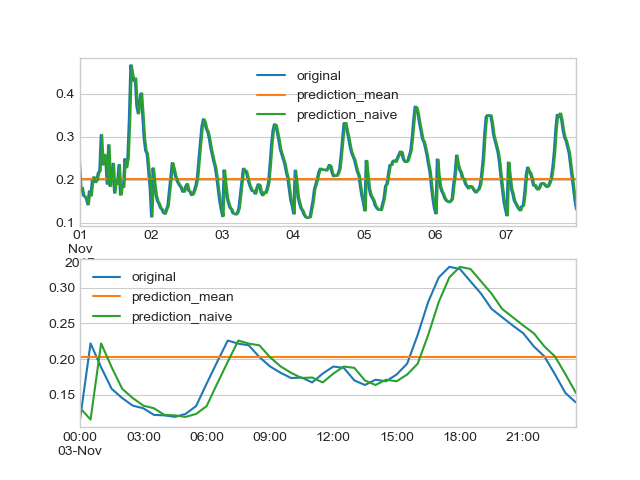

<AxesSubplot:>

In [18]:
# Fit the basic predictors
df_direction_centre = pd.DataFrame()
df_direction_centre['original'] = df_T_half_hourly.mean(axis=1)
df_direction_centre['prediction_mean']  = df_T_half_hourly.mean(axis=1).mean()
df_direction_centre['prediction_naive'] = df_T_half_hourly.mean(axis=1).shift(1)

fig, ax = plt.subplots(2,1)
to_plot = ['original','prediction_mean','prediction_naive']
df_direction_centre[to_plot]['2017-11-01':'2017-11-07'].plot(ax=ax[0])
df_direction_centre[to_plot]['2017-11-03'].plot(ax=ax[1])

We could try to see how good an arima prediction is on each user and calculate the MSE for this but i'm not sure if it's worth doing all this effort.